# PART A 

# Data import and Understanding 

### Read the ‘Signals.csv’ as DataFrame and import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
data = pd.read_csv('Part-+1%2C2%263+-+Signal.csv')

In [3]:
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

### Check for missing values and print percentage for each attribute. 

In [5]:
missing_percentage = data.isnull().sum() / len(data) * 100
print("Missing percentage for each attribute:")
print(missing_percentage)

Missing percentage for each attribute:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


### Check for presence of duplicate records in the dataset and impute with appropriate method.

In [6]:
duplicates = data.duplicated()
print("Duplicate rows before imputation:")
print(data[duplicates])

Duplicate rows before imputation:
      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11

In [7]:
numeric_cols = ['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4', 'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8', 'Parameter 9', 'Parameter 10', 'Parameter 11']
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [8]:
categorical_col = "Signal_Strength"
data[categorical_col] = data[categorical_col].fillna(data[categorical_col].mode().iloc[0])

In [9]:
data = data.drop_duplicates()

In [10]:
duplicates_after_imputation = data.duplicated()
has_duplicates_after_imputation = duplicates_after_imputation.any()

In [11]:
print("\nDuplicate rows after imputation:")
print(data[duplicates_after_imputation])

if has_duplicates_after_imputation:
    print("Duplicates still present after imputation.")
else:
    print("No duplicates found after imputation.")


Duplicate rows after imputation:
Empty DataFrame
Columns: [Parameter 1, Parameter 2, Parameter 3, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 8, Parameter 9, Parameter 10, Parameter 11, Signal_Strength]
Index: []
No duplicates found after imputation.


### Visualise distribution of the target variable.

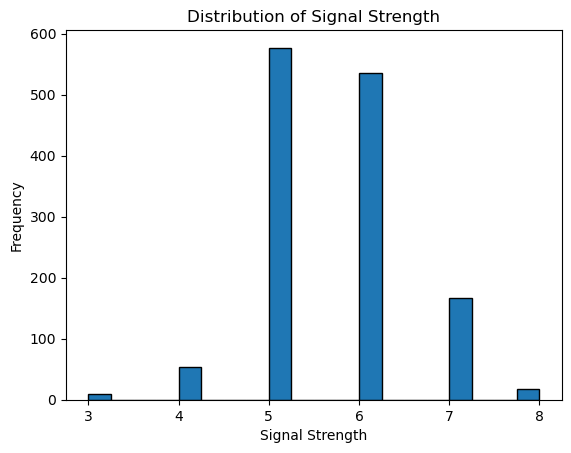

In [12]:
plt.hist(data['Signal_Strength'], bins=20, edgecolor='black')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.title('Distribution of Signal Strength')
plt.show()

### Share insights from the initial data analysis (at least 2)

The Signal Strength distribution is between 5 and 6.
There are no missing values in the dataset.

## Data preprocessing

### Split the data into X & Y.

In [13]:
X = data.drop(columns=['Signal_Strength'])
Y = data['Signal_Strength']

### Split the data into train & test with 70:30 proportion.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 30, random_state = 42)

### Print shape of all the 4 variables and verify if train and test data is in sync

In [15]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test;", Y_test.shape)

Shape of X_train: (1329, 11)
Shape of Y_train: (1329,)
Shape of X_test: (30, 11)
Shape of Y_test; (30,)


### Normalise the train and test data with appropriate method.

In [16]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Transform Labels into format acceptable by Neural Network 

In [17]:
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

onehot_encoder = OneHotEncoder(sparse=False)
Y_train_onehot = onehot_encoder.fit_transform(Y_train_encoded.reshape(-1, 1))
Y_test_onehot = onehot_encoder.transform(Y_test_encoded.reshape(-1, 1))


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Model Training & Evaluation using Neural Network

### Design a Neural Network to train a classifier.

In [18]:
num_classes = len(data['Signal_Strength'].unique())

model = keras.Sequential([layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)), layers.Dense(32, activation = 'relu'),layers.Dense(num_classes, activation = 'softmax') ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Plot 2 separate visuals.
i. Training Loss and Validation Loss

Epoch 1/50
34/34 [==============================] - 2s 12ms/step - loss: 1.6215 - accuracy: 0.4440 - val_loss: 1.4258 - val_accuracy: 0.5414
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 1.2976 - accuracy: 0.5409 - val_loss: 1.2039 - val_accuracy: 0.5301
Epoch 3/50
34/34 [==============================] - 0s 5ms/step - loss: 1.1761 - accuracy: 0.5466 - val_loss: 1.1541 - val_accuracy: 0.5451
Epoch 4/50
34/34 [==============================] - 0s 4ms/step - loss: 1.1288 - accuracy: 0.5644 - val_loss: 1.1302 - val_accuracy: 0.5150
Epoch 5/50
34/34 [==============================] - 0s 4ms/step - loss: 1.0886 - accuracy: 0.5560 - val_loss: 1.0931 - val_accuracy: 0.5639
Epoch 6/50
34/34 [==============================] - 0s 4ms/step - loss: 1.0586 - accuracy: 0.5550 - val_loss: 1.0754 - val_accuracy: 0.5714
Epoch 7/50
34/34 [==============================] - 0s 4ms/step - loss: 1.0365 - accuracy: 0.5635 - val_loss: 1.0635 - val_accuracy: 0.5677
Epoch 8/50
34/34 [=

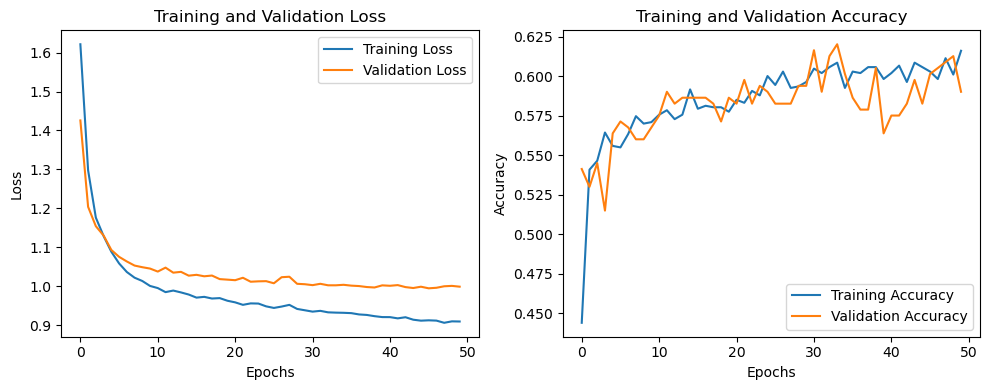

In [19]:
# Train the classifier
history = model.fit(X_train, Y_train_onehot, epochs = 50, batch_size = 32, validation_split = 0.2, verbose = 1)

# Plot training loss and validation loss
plt.figure(figsize = (10, 4))

# i. Training Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# ii. Train and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Design new architecture/update existing architecture in attempt to improve the performance of the model. 

In [20]:
updated_model = keras.Sequential([layers.Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)), layers.Dense(64, activation = 'relu'),layers.Dense(32, activation = 'relu'),layers.Dense(1)])

updated_model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
updated_history = updated_model.fit(X_train, Y_train, epochs = 50, batch_size = 32, validation_split = 0.2, verbose = 1)

Epoch 1/50
34/34 [==============================] - 2s 10ms/step - loss: 16.1553 - mae: 3.6535 - val_loss: 1.1921 - val_mae: 0.8447
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 1.2720 - mae: 0.8879 - val_loss: 1.0004 - val_mae: 0.7853
Epoch 3/50
34/34 [==============================] - 0s 4ms/step - loss: 0.8332 - mae: 0.7034 - val_loss: 0.8389 - val_mae: 0.7129
Epoch 4/50
34/34 [==============================] - 0s 4ms/step - loss: 0.7199 - mae: 0.6560 - val_loss: 0.7656 - val_mae: 0.6698
Epoch 5/50
34/34 [==============================] - 0s 4ms/step - loss: 0.6723 - mae: 0.6311 - val_loss: 0.7381 - val_mae: 0.6596
Epoch 6/50
34/34 [==============================] - 0s 4ms/step - loss: 0.6339 - mae: 0.6102 - val_loss: 0.6981 - val_mae: 0.6272
Epoch 7/50
34/34 [==============================] - 0s 4ms/step - loss: 0.6142 - mae: 0.6002 - val_loss: 0.6735 - val_mae: 0.6230
Epoch 8/50
34/34 [==============================] - 0s 4ms/step - loss: 0.5870 - mae: 0.

### Plot visuals as in Q3.C and share insights about difference observed in both the models

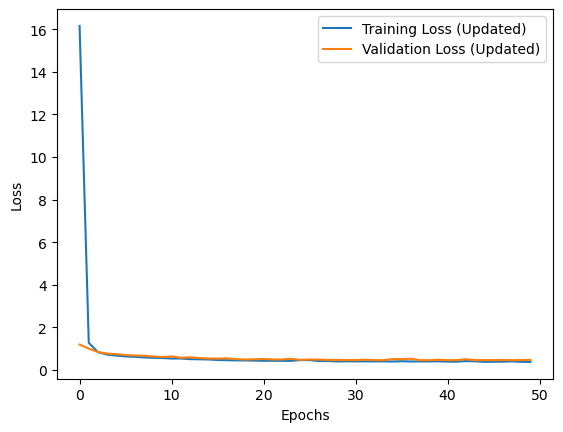

In [21]:
# i. Training Loss and Validation Loss for the updated model
plt.plot(updated_history.history['loss'], label='Training Loss (Updated)')
plt.plot(updated_history.history['val_loss'], label='Validation Loss (Updated)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


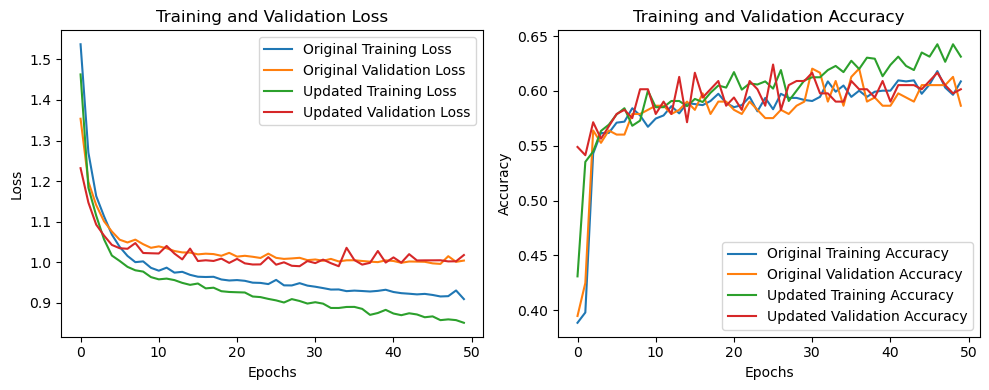

In [22]:
# Original architecture
original_model = keras.Sequential([layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)), layers.Dense(32, activation = 'relu'),layers.Dense(num_classes, activation = 'softmax')])
original_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
original_history = original_model.fit(X_train, Y_train_onehot, epochs = 50, batch_size = 32, validation_split = 0.2, verbose = 0)


# New architecture (updated model)
updated_model = keras.Sequential([layers.Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)), layers.Dense(64, activation = 'relu'),layers.Dense(32, activation = 'relu'),layers.Dense(num_classes, activation = 'softmax')])
updated_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
updated_history = updated_model.fit(X_train, Y_train_onehot, epochs = 50, batch_size = 32, validation_split = 0.2, verbose = 0)

# Plot training loss and validation loss for both models
plt.figure(figsize = (10, 4))

# i. Training Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(original_history.history['loss'], label = 'Original Training Loss')
plt.plot(original_history.history['val_loss'], label = 'Original Validation Loss')
plt.plot(updated_history.history['loss'], label = 'Updated Training Loss')
plt.plot(updated_history.history['val_loss'], label = 'Updated Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Train and validation accuracy for both models
plt.subplot(1, 2, 2)
plt.plot(original_history.history['accuracy'], label = 'Original Training Accuracy')
plt.plot(original_history.history['val_accuracy'], label = 'Original Validation Accuracy')
plt.plot(updated_history.history['accuracy'], label = 'Updated Training Accuracy')
plt.plot(updated_history.history['val_accuracy'], label = 'Updated Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

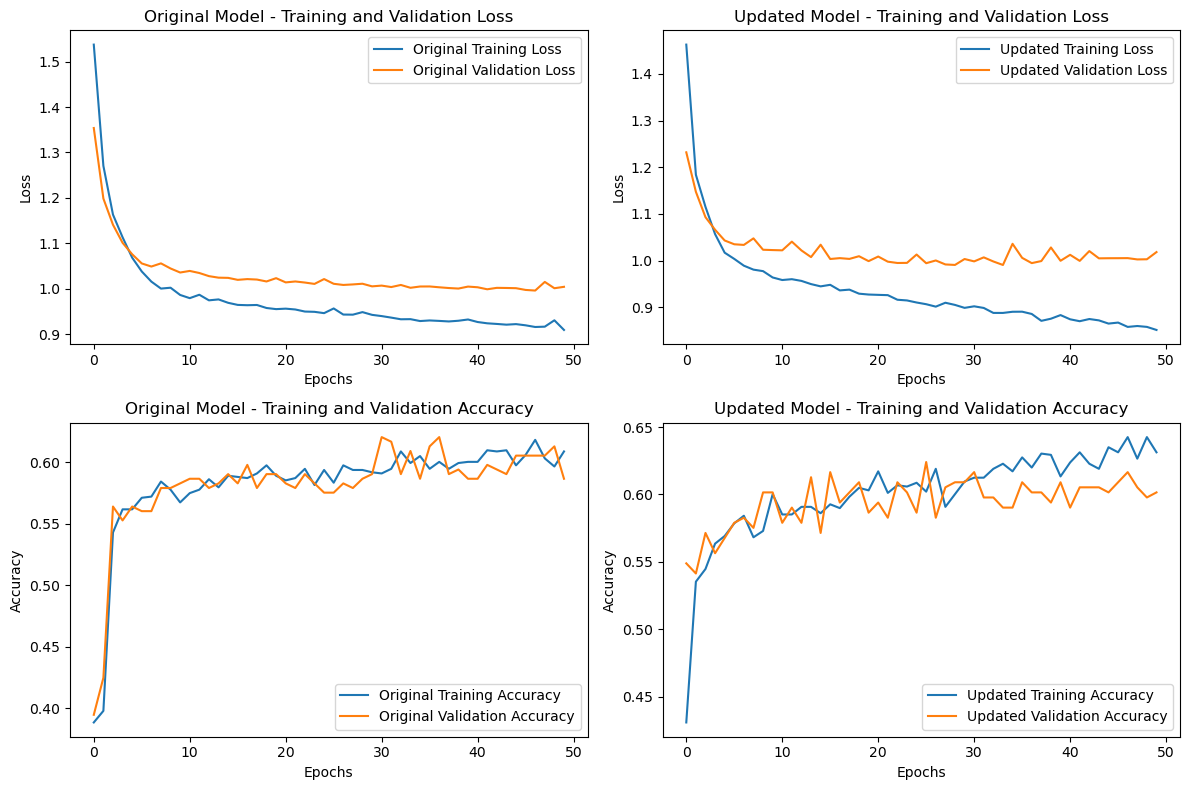

Insights:
Original Model - Final Validation Loss: 1.0044
Updated Model - Final Validation Loss: 1.0181
Original Model - Final Validation Accuracy: 0.5865
Updated Model - Final Validation Accuracy: 0.6015


In [23]:
# Plot visuals for original and updated models
plt.figure(figsize = (12, 8))

# i. Training Loss and Validation Loss for both models
plt.subplot(2, 2, 1)
plt.plot(original_history.history['loss'], label='Original Training Loss')
plt.plot(original_history.history['val_loss'], label='Original Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Original Model - Training and Validation Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(updated_history.history['loss'], label='Updated Training Loss')
plt.plot(updated_history.history['val_loss'], label='Updated Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Updated Model - Training and Validation Loss')
plt.legend()

# ii. Training Accuracy and Validation Accuracy for both models
plt.subplot(2, 2, 3)
plt.plot(original_history.history['accuracy'], label='Original Training Accuracy')
plt.plot(original_history.history['val_accuracy'], label='Original Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Original Model - Training and Validation Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(updated_history.history['accuracy'], label='Updated Training Accuracy')
plt.plot(updated_history.history['val_accuracy'], label='Updated Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Updated Model - Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Insights about the differences observed
original_val_loss = original_history.history['val_loss'][-1]
updated_val_loss = updated_history.history['val_loss'][-1]
original_val_accuracy = original_history.history['val_accuracy'][-1]
updated_val_accuracy = updated_history.history['val_accuracy'][-1]

print("Insights:")
print(f"Original Model - Final Validation Loss: {original_val_loss:.4f}")
print(f"Updated Model - Final Validation Loss: {updated_val_loss:.4f}")
print(f"Original Model - Final Validation Accuracy: {original_val_accuracy:.4f}")
print(f"Updated Model - Final Validation Accuracy: {updated_val_accuracy:.4f}")


# PART B

## Data Import and Exploration

In [24]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten
from keras.optimizers import Adam

### Read the .h5 file and assign to a variable

In [25]:
df = h5py.File('Autonomous_Vehicles_SVHN_single_grey1 (4).h5', 'r')

### Print all the keys from the .h5 file

In [26]:
df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

### Split the data into X_train, X_test, Y_train, Y_test

In [27]:
X_train = df['X_train'][:]
y_train = df['y_train'][:]
X_test = df['X_test'][:]
y_test = df['y_test'][:]

## Data Visualisation and preprocessing

### Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. 

In [28]:
print("X_train shape:", X_train.shape)
print("Y_train shape:",y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
Y_train shape: (42000,)
X_test shape: (18000, 32, 32)
Y_test shape: (18000,)


### Visualise first 10 images in train data and print its corresponding labels

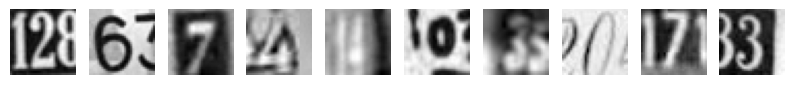

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

### Reshape all the images with appropriate shape update the data in same variable

In [30]:
X_train= X_train.reshape(X_train.shape[0],1024)
X_test = X_test.reshape(X_test.shape[0],1024)

### Normalise the images i.e. Normalise the pixel values. 

In [31]:
X_train= X_train/255.0
X_test =X_test/255.0
print('Training set',X_train.shape,y_train.shape)
print('Testset',X_test.shape,y_test.shape)

Training set (42000, 1024) (42000,)
Testset (18000, 1024) (18000,)


### Transform Labels into format acceptable by Neural Network

In [32]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Print total Number of classes in the Dataset.

In [33]:
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


## Model Training & Evaluation using Neural Network 

### Design a Neural Network to train a classifier. 

In [34]:
def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

### Train the classifier using previously designed Architecture (Use best suitable parameters).

In [35]:
# build the model
model = nn_model()

# Compile model
sgd = optimizers.Adam(lr=1e-3)

# Loss function = Categorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

# Fitting the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)


Epoch 1/100
140/140 - 4s - loss: 2.3042 - accuracy: 0.1007 - val_loss: 2.2998 - val_accuracy: 0.1019 - 4s/epoch - 28ms/step
Epoch 2/100
140/140 - 2s - loss: 2.2250 - accuracy: 0.1564 - val_loss: 2.0465 - val_accuracy: 0.2402 - 2s/epoch - 15ms/step
Epoch 3/100
140/140 - 2s - loss: 1.8227 - accuracy: 0.3496 - val_loss: 1.6339 - val_accuracy: 0.4418 - 2s/epoch - 15ms/step
Epoch 4/100
140/140 - 2s - loss: 1.5378 - accuracy: 0.4727 - val_loss: 1.4673 - val_accuracy: 0.4991 - 2s/epoch - 14ms/step
Epoch 5/100
140/140 - 2s - loss: 1.3845 - accuracy: 0.5376 - val_loss: 1.3332 - val_accuracy: 0.5657 - 2s/epoch - 15ms/step
Epoch 6/100
140/140 - 2s - loss: 1.3071 - accuracy: 0.5738 - val_loss: 1.2378 - val_accuracy: 0.5991 - 2s/epoch - 15ms/step
Epoch 7/100
140/140 - 2s - loss: 1.2244 - accuracy: 0.6062 - val_loss: 1.1900 - val_accuracy: 0.6241 - 2s/epoch - 14ms/step
Epoch 8/100
140/140 - 2s - loss: 1.1699 - accuracy: 0.6285 - val_loss: 1.1696 - val_accuracy: 0.6296 - 2s/epoch - 15ms/step
Epoch 9/

### Evaluate performance of the model with appropriate metrics

In [36]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.7058042287826538
Accuracy: 0.801111102104187


### Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same

Text(0.5, 1.0, 'Training and validation loss')

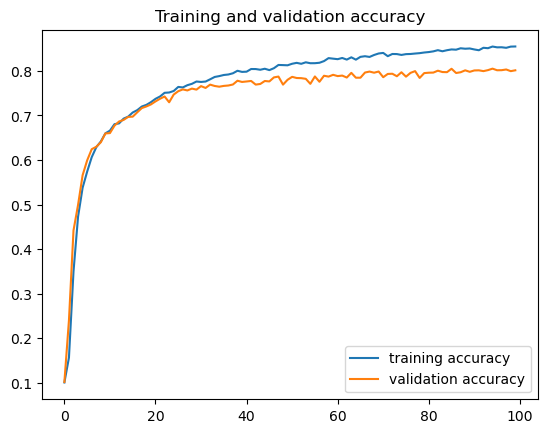

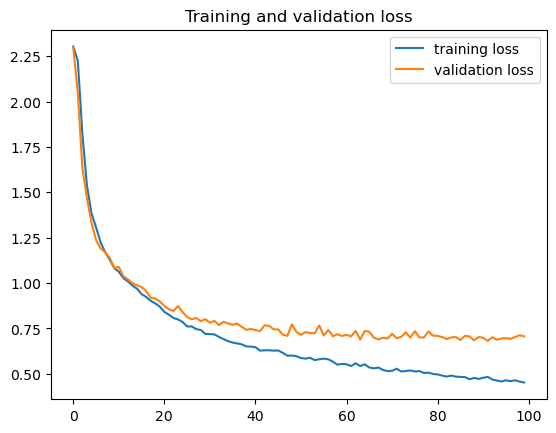

In [37]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) 

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

There are around 10 classes in the dataset which represent digits from 0-9.

We tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 80.11 %.

Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.